In [ ]:
# ! pip install pyLDAvis

In [ ]:
import pandas as pd
import numpy as np
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re
import pyLDAvis
import pyLDAvis.gensim

import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
from textacy import preprocessing
import textacy

ModuleNotFoundError: No module named 'textacy'

In [ ]:
def pre_processing():
  df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
  print("Shape of the data frame", df.shape)
  print("Duplicates", df.duplicated().sum())
  print("Null Values:" ,df.isnull().sum())

  print("Dropping the duplicate records.....")
  df.drop_duplicates(inplace=True)

  print("Dropping the null values")
  df.dropna(inplace=True)

  print("Changing data to lower case")
  df['clean_comment'] = df['clean_comment'].str.lower()

  df['length_clean_comment'] = df['clean_comment'].apply(lambda x: len(str(x)))

  print("Strip off the white spaces..")
  df['clean_comment'] = df['clean_comment'].str.replace(r'\s+', ' ', regex=True).str.strip()
  df['length_clean_comment_nowhite_space'] = df['clean_comment'].apply(lambda x: len(str(x)))
  print("Number of rows have white spaces:" , df[df['length_clean_comment']!= df['length_clean_comment_nowhite_space']].shape[0])

  print("Removing Html tags....")
  df['clean_comment'] = df['clean_comment'].apply(preprocessing.remove.html_tags)
  df['length_nowhite_space_htmltag'] = df['clean_comment'].apply(lambda x: len(str(x)))
  print("Number of rows have Html tags:" , df[df['length_clean_comment_nowhite_space']!= df['length_nowhite_space_htmltag']].shape[0])

  print("Removing Punctuation....")
  df['clean_comment'] = df['clean_comment'].apply(preprocessing.remove.punctuation)
  df['length_htmltag_punctuation'] = df['clean_comment'].apply(lambda x: len(str(x)))
  print("Number of rows have punctuation:" , df[df['length_nowhite_space_htmltag']!= df['length_htmltag_punctuation']].shape[0])

  print("Removing brackets....")
  df['clean_comment'] = df['clean_comment'].apply(preprocessing.remove.punctuation)
  df['length_punctuation_brackets'] = df['clean_comment'].apply(lambda x: len(str(x)))
  print("Number of rows have brackets:" , df[df['length_htmltag_punctuation']!= df['length_punctuation_brackets']].shape[0])

  # Apply the function to the 'clean_comment' column in a single line
  df['clean_comment'] = df['clean_comment'].apply(lambda x: preprocessing.replace.emojis(x, ""))
  df['length_brackets_emojis'] = df['clean_comment'].apply(lambda x: len(str(x)))
  print("Number of rows have emojis:" , df[df['length_punctuation_brackets']!= df['length_brackets_emojis']].shape[0])


  # Regular expression to match emojis
  emoji_pattern = re.compile("[\U0001F600-\U0001F64F"  # Emoticons
                            "\U0001F300-\U0001F5FF"  # Symbols and Pictographs
                            "\U0001F680-\U0001F6FF"  # Transport and Map Symbols
                            "\U0001F700-\U0001F77F"  # Alchemical Symbols
                            "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                            "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                            "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                            "\U0001FA00-\U0001FA6F"  # Chess Symbols
                            "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                            "\U00002702-\U000027B0"  # Dingbats
                            "\U000024C2-\U0001F251"  # Enclosed characters
                            "]", flags=re.UNICODE)

  # Filter out rows where 'clean_comment' contains emojis
  print("Number of non meaning  rows:", df[df['clean_comment'].apply(lambda x: bool(emoji_pattern.search(x)))].shape)
  df = df[~df['clean_comment'].apply(lambda x: bool(emoji_pattern.search(x)))]


  # List of words to keep even if their length is less than 4
  keep_words = ['lol', 'wow', 'wtf', 'fun', 'sad', 'old']

  # Filter out rows with clean_comment length < 4 unless they contain one of the keep_words
  df = df[(df['length_clean_comment'] >= 4) | df['clean_comment'].isin(keep_words)]

  return df[['clean_comment', 'category', 'length_clean_comment']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pre_processing()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Shape of the data frame (37249, 2)
Duplicates 449
Null Values: clean_comment    100
category           0
dtype: int64
Dropping the duplicate records.....
Dropping the null values
Changing data to lower case
Strip off the white spaces..
Number of rows have white spaces: 32407
Removing Html tags....
Number of rows have Html tags: 0
Removing Punctuation....
Number of rows have punctuation: 0
Removing brackets....
Number of rows have brackets: 0
Number of rows have emojis: 55
Number of non meaning  rows: (148, 8)


In [ ]:
df[df['length_clean_comment'] < 4 ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,clean_comment,category,length_clean_comment
2689,lol,1,3
5060,wow,1,3
7506,wtf,-1,3
9524,fun,1,3
19110,sad,-1,3
23447,old,1,3


# testing

In [ ]:

import string

# Check if each comment contains punctuation
df['has_punctuation'] = df['clean_comment'].apply(lambda x: any(char in string.punctuation for char in x))

# Display the result
df[df['has_punctuation']==True]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,clean_comment,category,has_punctuation


In [ ]:
# Check if each comment contains any brackets (round or square)
df['has_bracket'] = df['clean_comment'].apply(lambda x: any(bracket in x for bracket in '[]()'))

# Display the result
df[df['has_bracket']==True]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,clean_comment,category,has_punctuation,has_bracket


In [ ]:
import re

pd.set_option('display.max_rows', None)  # No limit on rows
pd.set_option('display.max_columns', None)

# Regular expression to match emojis
emoji_pattern = re.compile("[\U0001F600-\U0001F64F"  # Emoticons
                           "\U0001F300-\U0001F5FF"  # Symbols and Pictographs
                           "\U0001F680-\U0001F6FF"  # Transport and Map Symbols
                           "\U0001F700-\U0001F77F"  # Alchemical Symbols
                           "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           "\U0001FA00-\U0001FA6F"  # Chess Symbols
                           "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           "\U00002702-\U000027B0"  # Dingbats
                           "\U000024C2-\U0001F251"  # Enclosed characters
                           "]", flags=re.UNICODE)

# Check if each comment contains any emoji
df['has_emoji'] = df['clean_comment'].apply(lambda x: bool(emoji_pattern.search(x)))

# Display the result
df[df['has_emoji']==True]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,clean_comment,category,has_punctuation,has_bracket,has_emoji


In [ ]:
# null values
df[df['clean_comment'].isnull()].shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, 5)

In [ ]:
df['category'].value_counts()/df.shape[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
category,
1,0.429456
0,0.345639
-1,0.224905


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36651 entries, 0 to 37248
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   clean_comment                       36651 non-null  object
 1   category                            36651 non-null  int64 
 2   length_clean_comment                36651 non-null  int64 
 3   length_clean_comment_nowhite_space  36651 non-null  int64 
 4   length_nowhite_space_htmltag        36651 non-null  int64 
 5   length_htmltag_punctuation          36651 non-null  int64 
 6   length_punctuation_brackets         36651 non-null  int64 
 7   length_brackets_emojis              36651 non-null  int64 
 8   has_emoji                           36651 non-null  bool  
dtypes: bool(1), int64(7), object(1)
memory usage: 2.6+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# EDA

In [ ]:
df['clean_comment'] =df['clean_comment'].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,clean_comment,category,length_clean_comment
0,family mormon have never tried explain them th...,1,261
1,buddhism has very much lot compatible with chr...,1,1269
2,seriously don say thing first all they won get...,-1,460
3,what you have learned yours and only yours wha...,0,168
4,for your own benefit you may want read living ...,1,691


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

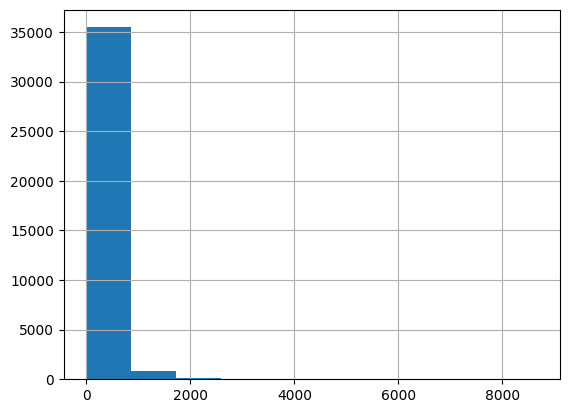

In [ ]:
# The Distrubtion on character level
df['clean_comment'].str.len().hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

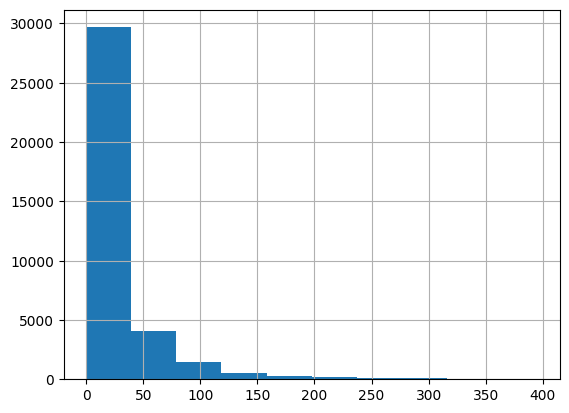

In [ ]:
# The Frequency on Word level
# Code Snippet for Word Number Histogram

def word_count(string):
    words = string.split()
    return len(words)

df['word_count'] = df['clean_comment'].apply(word_count)
df['word_count'][df['word_count']<400].hist()

In [ ]:
df['average_word_length'] = df['clean_comment'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

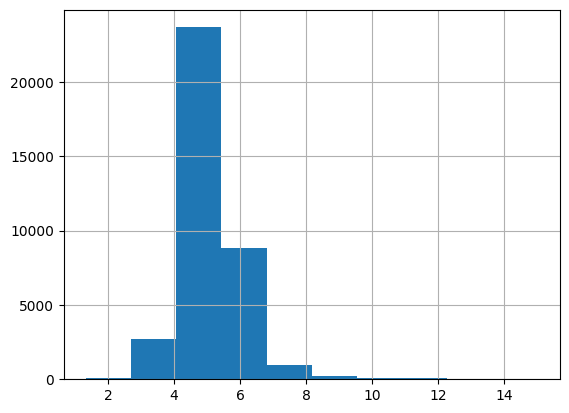

In [ ]:
df['average_word_length'][df['average_word_length'] <= 15].hist()

In [ ]:
! pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop = set(stopwords.words('english'))


In [ ]:
corpus=[]
new= df['clean_comment'].str.split()
new=new.values.tolist()
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Code Snippet for Top Stopwords Barchart

import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


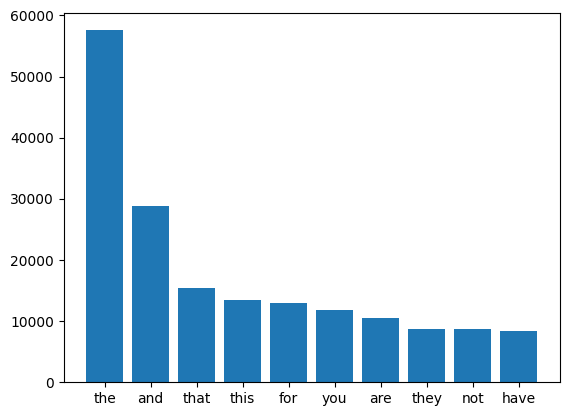

In [ ]:
plot_top_stopwords_barchart(df['clean_comment'])

In [ ]:
# Code Snippet for Top Non-Stopwords Barchart

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english')) - set('not')

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


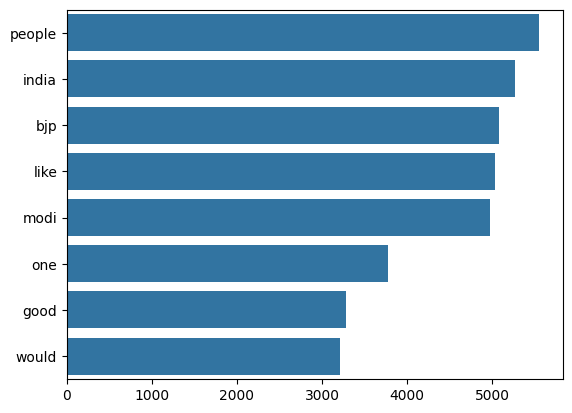

In [ ]:
plot_top_non_stopwords_barchart(df['clean_comment'])

In [ ]:
# Code Snippet for Top N-grams Barchart

import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


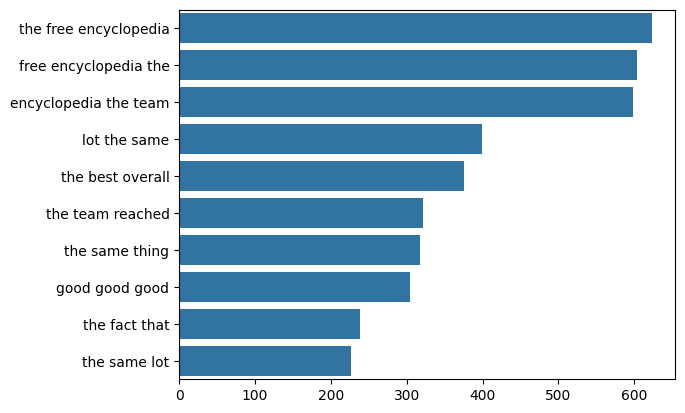

In [ ]:

plot_top_ngrams_barchart(df['clean_comment'],3)

In [ ]:
! pip install pyLDAvis.gensim

ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim


In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
 # Code Snippet for Creating LDA visualization

import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim
from nltk.corpus import stopwords

def get_lda_objects(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))


    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus

    corpus=_preprocess_text(text)

    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]



    lda_model =  gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 3,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)

    coherence_model_lda = CoherenceModel(model=lda_model, texts=bow_corpus, dictionary=dic, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('nCoherence Score: ', coherence_lda)

    return lda_model, bow_corpus, dic



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model, bow_corpus, dic = get_lda_objects(df['clean_comment'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


nCoherence Score:  nan


In [ ]:

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.104899  0.115300       1        1  50.866158
2     -0.095251 -0.119066       2        1  33.490102
1      0.200150  0.003766       3        1  15.643740, topic_info=          Term         Freq        Total Category  logprob  loglift
1433       bjp  5133.000000  5133.000000  Default  30.0000  30.0000
1430  congress  2621.000000  2621.000000  Default  29.0000  29.0000
1095     party  2657.000000  2657.000000  Default  28.0000  28.0000
2560  pakistan  1554.000000  1554.000000  Default  27.0000  27.0000
1451    muslim  1423.000000  1423.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
2202      look   265.935546  1173.342139   Topic3  -6.0548   0.3707
274     really   273.191742  1428.950609   Topic3  -6.0279   0.2006
29        also   290.319491  2211.395993   Topic3  -5.9671  -0.1753
105        see   264.435665  1760.233040   Topic3  -6.0605  -0.0405
133        get   250.357839  2919.704425   Topic3  -6.1152  -0.6012

[247 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2839      1  0.997605     2014
8021      1  0.997319     2019
3479      1  0.123277    actor
3479      3  0.875268    actor
29        1  0.630823     also
...     ...       ...      ...
538       3  0.021691     year
3529      2  0.997201      yeh
5842      1  0.073646  youtube
5842      2  0.137473  youtube
5842      3  0.790471  youtube

[385 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

In [ ]:
 #Code Snippet for Wordcloud

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus

    corpus=_preprocess_text(text)

    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


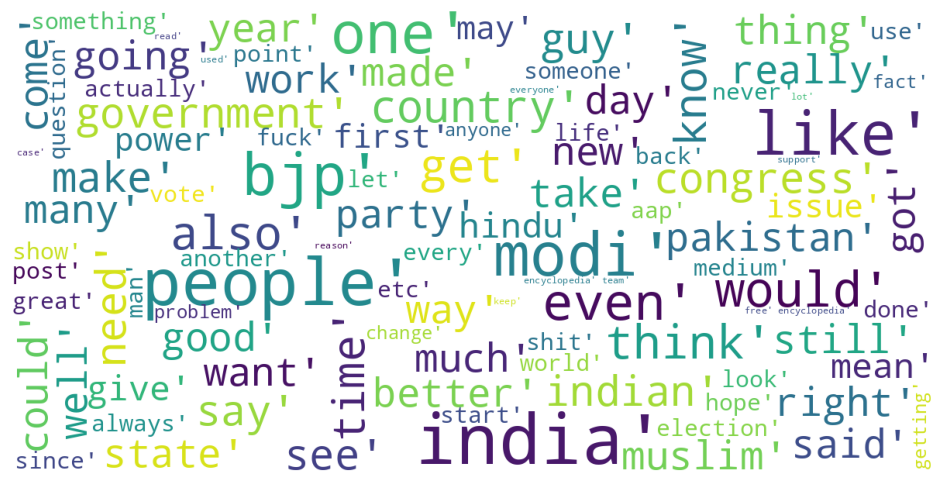

In [ ]:
plot_wordcloud(df['clean_comment'])

# sweetviz

In [ ]:
!pip install sweetviz

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 65.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import sweetviz as sv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sweetviz/graph.py:8: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_filename
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/d

In [ ]:
report = sv.analyze(df)
report.show_html("Titanic_EDA_Report.html")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                             |          | [  0%]   00:00 -> (? left)

Report Titanic_EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
report = sv.analyze(df)
report.show_html("Titanic_EDA_Report.html")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                             |          | [  0%]   00:00 -> (? left)

Report Titanic_EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Textacy

In [ ]:
!pip install textacy
!python -m spacy download en_core_web_sm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 68.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from textacy import preprocessing as preproc
import textacy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
text1 = """OMG!!! This product is TOTALY useless, like I h8 it soooo much 😡😡. It broked after only 2 days!!! 😭😭 Would NOT recommend to anyone unless u want 2 waste ur $$$$!!! BUY AT UR OWN RISK 😡!! PS: customer srvce??? haha, a joke!!! Call center kept me on hold 4EVER!!!! 😤 so rud!!! #NeverAgain #TrashProduct

but w8--my friend got same thing and loves it 🤷🤷‍♀️ idk maybe I got a bad one???. Still, it's 2* from me, max. 5* for her tho. 🙄🙄"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
doc = textacy.make_spacy_doc(text1, lang="en_core_web_sm")
print(doc.text)

OMG!!! This product is TOTALY useless, like I h8 it soooo much 😡😡. It broked after only 2 days!!! 😭😭 Would NOT recommend to anyone unless u want 2 waste ur $$$$!!! BUY AT UR OWN RISK 😡!! PS: customer srvce??? haha, a joke!!! Call center kept me on hold 4EVER!!!! 😤 so rud!!! #NeverAgain #TrashProduct

but w8--my friend got same thing and loves it 🤷🤷‍♀️ idk maybe I got a bad one???. Still, it's 2* from me, max. 5* for her tho. 🙄🙄


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from textacy import extract
list(extract.entities(doc, include_types={"PERSON", "LOCATION"}))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[max]

In [ ]:
from textacy import text_stats as ts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ts.n_words(doc), ts.n_unique_words(doc)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(96, 78)

In [ ]:
ts.diversity.ttr(doc)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8125

In [ ]:
ts.flesch_kincaid_grade_level(doc)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.025000000000000355

In [ ]:
from textacy import extract
list(extract.ngrams(doc, 2, filter_punct=True))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[TOTALY useless,
 😡😡,
 2 days,
 😭😭,
 u want,
 want 2,
 2 waste,
 waste ur,
 ur $,
 $$,
 $$,
 $$,
 RISK 😡,
 customer srvce,
 center kept,
 hold 4EVER,
 -my friend,
 friend got,
 🤷🤷,
 🤷‍,
 ‍♀,
 ♀️,
 ️ idk,
 idk maybe,
 🙄🙄]

In [ ]:
extract.keyterms.textrank(doc, normalize="lemma", topn=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('🤷 🤷 \u200d ♀ ️ idk', 0.06533784664553403),
 ('😡 😡', 0.0375680905664932),
 ('RISK 😡', 0.027980125158041696),
 ('😭 😭', 0.025727687762757606),
 ('-my friend', 0.020184423635425087),
 ('customer srvce', 0.018921543690703965),
 ('hold 4EVER', 0.018331809235273118),
 ('TOTALY useless', 0.017069654043051895),
 ('🙄 🙄', 0.016648618586160582),
 ('w8', 0.011106361825660178)]

In [ ]:
text1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"OMG!!! This product is TOTALY useless, like I h8 it soooo much 😡😡. It broked after only 2 days!!! 😭😭 Would NOT recommend to anyone unless u want 2 waste ur $$$$!!! BUY AT UR OWN RISK 😡!! PS: customer srvce??? haha, a joke!!! Call center kept me on hold 4EVER!!!! 😤 so rud!!! #NeverAgain #TrashProduct\n\nbut w8--my friend got same thing and loves it 🤷🤷\u200d♀️ idk maybe I got a bad one???. Still, it's 2* from me, max. 5* for her tho. 🙄🙄"

In [ ]:
from textacy import preprocessing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
preprocessing.remove.punctuation(text1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'OMG    This product is TOTALY useless  like I h8 it soooo much 😡😡  It broked after only 2 days    😭😭 Would NOT recommend to anyone unless u want 2 waste ur $$$$    BUY AT UR OWN RISK 😡   PS  customer srvce    haha  a joke    Call center kept me on hold 4EVER     😤 so rud     NeverAgain  TrashProduct\n\nbut w8  my friend got same thing and loves it 🤷🤷\u200d♀️ idk maybe I got a bad one     Still  it s 2  from me  max  5  for her tho  🙄🙄'

In [ ]:
def unicode(text: str, *, form: Literal["NFC", "NFD", "NFKC", "NFKD"] = "NFC") -> str:
    """
    Normalize unicode characters in ``text`` into canonical forms.

    Args:
        text
        form: Form of normalization applied to unicode characters.
            For example, an "e" with accute accent "´" can be written as "e´"
            (canonical decomposition, "NFD") or "é" (canonical composition, "NFC").
            Unicode can be normalized to NFC form without any change in meaning,
            so it's usually a safe bet. If "NFKC", additional normalizations are applied
            that can change characters' meanings, e.g. ellipsis characters are replaced
            with three periods.

    See Also:
        https://docs.python.org/3/library/unicodedata.html#unicodedata.normalize
    """
    return unicodedata.normalize(form, text)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: module 'textacy.preprocessing' has no attribute 'remove_punctuation'

In [ ]:
# Assuming preproc is a pre-defined preprocessing library similar to sklearn
preprocessor = preproc.make_pipeline(
    preproc.normalize.unicode,
    preproc.normalize.quotation_marks,
    preproc.normalize.whitespace
)
# doc = textacy.make_spacy_doc(text, lang="en_core_web_sm")
# Apply the pipeline to your input data `a`
preproc_text = preprocessor(text)  # Assuming `a` is a string

# View the preprocessed text
print(preproc_text)


OMG!!! This product is TOTALY useless, like I h8 it soooo much 😡😡. It broked after only 2 days!!! 😭😭 Would NOT recommend to anyone unless u want 2 waste ur $$$$!!! BUY AT UR OWN RISK 😡!! PS: customer srvce??? haha, a joke!!! Call center kept me on hold 4EVER!!!! 😤 so rud!!! #NeverAgain #TrashProduct
but w8--my friend got same thing and loves it 🤷🤷‍♀️ idk maybe I got a bad one???. Still, it's 2* from me, max. 5* for her tho. 🙄🙄


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
